In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


                                                Reviews Sentiments
0     লটির পো ) ভালোই প্রথম দিনেই বেশ বড় সাইজের একটা...  Negative 
1     এদের কাছ থেকে প্রডাক্ট নেওয়ার থেকে বাড়া  নিজে ...  Negative 
2     অডার করছিলাম ৪ বা ৫ তারিখ হতে বাড়া  পারে তার প...  Negative 
3                     হারামজাদা | বক্স ভিজা ছিল বাড়া  `  Negative 
4        বোতলের মুখ ভাংগা ছিল পুরাই ফালতু _ হারামজাদা -  Negative 
...                                                 ...        ...
3567  আলহামদুলিল্লাহ = বীজ সঠিক সময়ে হাতে পেয়েছি ভাল...   Positive
3568  যা ভেবেছিলাম তারচেয়ে অনেক ভালো ধন্যবাদ  আমার ভ...   Positive
3569  ভালোই ছিলো প্যাকেজিং ১০ টা ম্যাস্ক ছিলো সিল দে...   Positive
3570                   খুব ভালো মানের মাক্স  অসাধারণ  :   Positive
3571    চোখ বন্ধ করে কিনে ফালান অনেক ভালো  খুবই ভালো  +   Positive

[3572 rows x 2 columns]


<ipython-input-2-2c2567654721>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiments', data=Data, palette=colors.values())  # Pass values of the colors dictionary


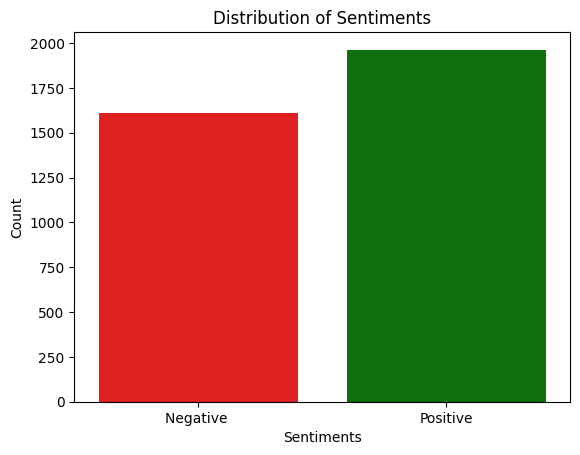

                                                Reviews Sentiments
0     লটির পো ভালোই প্রথম দিনেই বেশ বড় সাইজের একটা ধ...  negative 
1     এদের কাছ থেকে প্রডাক্ট নেওয়ার থেকে বাড়া নিজে গ...  negative 
2     অডার করছিলাম বা তারিখ হতে বাড়া পারে তার পরে ক্...  negative 
3                          হারামজাদা বক্স ভিজা ছিল বাড়া  negative 
4            বোতলের মুখ ভাংগা ছিল পুরাই ফালতু হারামজাদা  negative 
...                                                 ...        ...
3567  আলহামদুলিল্লাহ বীজ সঠিক সময়ে হাতে পেয়েছি ভালোই...   positive
3568  যা ভেবেছিলাম তারচেয়ে অনেক ভালো ধন্যবাদ আমার ভা...   positive
3569  ভালোই ছিলো প্যাকেজিং  টা ম্যাস্ক ছিলো সিল দেয়া...   positive
3570                       খুব ভালো মানের মাক্স অসাধারণ   positive
3571        চোখ বন্ধ করে কিনে ফালান অনেক ভালো খুবই ভালো   positive

[3572 rows x 2 columns]
                                                Reviews Sentiments  \
0     লটির পো ভালোই প্রথম দিনেই বেশ বড় সাইজের একটা ধ...  negative    
1     এদের কাছ থেকে প্রডাক্ট নে

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import re
import string
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from gensim.models import Word2Vec
from keras.models import Sequential
from keras.layers import Embedding, Bidirectional, LSTM, Dense
import numpy as np
!pip install nltk
import nltk
nltk.download('punkt')
# Load the data
Data = pd.read_excel("/content/drive/MyDrive/Thesis/Product Review Sentiment Analysis.xlsx")
print(Data)

import seaborn as sns
import matplotlib.pyplot as plt

# Define color palette
colors = {'negative': 'red', 'positive': 'green'}

# Plot the count of sentiments with specified palette
sns.countplot(x='Sentiments', data=Data, palette=colors.values())  # Pass values of the colors dictionary

# Set labels and title
plt.xlabel('Sentiments')
plt.ylabel('Count')
plt.title('Distribution of Sentiments')

# Show the plot
plt.show()

# Preprocessing Text
def preprocess_text(text):
    # Remove HTML tags
    text = re.sub('<[^<]+?>', '', text)
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Remove punctuation
    translator = str.maketrans('', '', string.punctuation)
    text = text.translate(translator)
    # Remove single characters
    text = ' '.join([word for word in text.split() if len(word) > 1])
    # Remove multiple spaces
    text = re.sub(r'\s+', ' ', text)
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Remove leading and trailing spaces
    text = text.strip()
    return text

Data['Reviews'] = Data['Reviews'].apply(lambda x: preprocess_text(x) if pd.notnull(x) else x)

Data['Sentiments'] = Data['Sentiments'].str.lower()
print(Data)

# Remove Bangla stopwords
bangla_stopwords = [
    'এই', 'সে', 'এ', 'তার', 'যে', 'আমাদের', 'তাদের', 'আমরা', 'তোমরা',
    'তুমি', 'তারা', 'যার', 'কোন', 'কিছু', 'এক', 'অনেক', 'অধিক', 'সব',
    'কত', 'কোথায়']
def remove_stopwords(text):
    words = word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in bangla_stopwords]
    filtered_text = ' '.join(filtered_words)
    return filtered_text

Data['Cleaned_Reviews'] = Data['Reviews'].apply(remove_stopwords)
from gensim.models import Word2Vec

print(Data)
# Tokenization
def tokenize_text(text):
    translator = str.maketrans('', '', string.punctuation)
    text = text.translate(translator)
    tokens = word_tokenize(text)
    return tokens

Data['Tokenized_Reviews'] = Data['Reviews'].apply(lambda x: tokenize_text(x) if pd.notnull(x) else x)

# Remove null values
Data = Data.dropna(subset=['Tokenized_Reviews'])
print(Data)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Tokenize the reviews
Data['Tokenized_Reviews'] = Data['Reviews'].apply(tokenize_text)

# Convert tokenized reviews back to text for TF-IDF vectorization
Data['Tokenized_Text'] = Data['Tokenized_Reviews'].apply(lambda tokens: ' '.join(tokens))

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the tokenized text to obtain TF-IDF vectors
tfidf_vectors = tfidf_vectorizer.fit_transform(Data['Tokenized_Text'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(tfidf_vectors, Data['Sentiments'], test_size=0.20, random_state=42)

# Convert sentiments into numerical labels
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)


In [ ]:
X_train.shape

(2857, 572)

In [ ]:
from keras.layers import Input, Bidirectional, LSTM, Dense, Dropout
from keras.models import Model

# Define the BiLSTM model
def build_bilstm_model(input_dim):
    inputs = Input(shape=(input_dim,))
    x = Dense(128, activation='relu')(inputs)
    x = Dropout(0.5)(x)
    x = Dense(64, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(32, activation='relu')(x)
    x = Dropout(0.5)(x)
    outputs = Dense(1, activation='sigmoid')(x)  # Sigmoid activation for binary classification

    model = Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Initialize and build the BiLSTM model
bilstm_model = build_bilstm_model(X_train.shape[1])

# Train the model
history = bilstm_model.fit(X_train.toarray(), y_train, epochs=100, batch_size=64, validation_split=0.2)

# Evaluate the model on test data
loss, accuracy = bilstm_model.evaluate(X_test.toarray(), y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')


Epoch 1/100
36/36 [==============================] - 7s 33ms/step - loss: 0.6791 - accuracy: 0.5786 - val_loss: 0.6513 - val_accuracy: 0.5734
Epoch 2/100
36/36 [==============================] - 0s 11ms/step - loss: 0.5946 - accuracy: 0.7050 - val_loss: 0.4145 - val_accuracy: 0.9143
Epoch 3/100
36/36 [==============================] - 1s 16ms/step - loss: 0.3274 - accuracy: 0.9024 - val_loss: 0.1824 - val_accuracy: 0.9283
Epoch 4/100
36/36 [==============================] - 1s 15ms/step - loss: 0.1898 - accuracy: 0.9374 - val_loss: 0.1599 - val_accuracy: 0.9336
Epoch 5/100
36/36 [==============================] - 1s 15ms/step - loss: 0.1462 - accuracy: 0.9505 - val_loss: 0.1527 - val_accuracy: 0.9388
Epoch 6/100
36/36 [==============================] - 1s 15ms/step - loss: 0.1369 - accuracy: 0.9575 - val_loss: 0.1551 - val_accuracy: 0.9406
Epoch 7/100
36/36 [==============================] - 1s 17ms/step - loss: 0.1198 - accuracy: 0.9628 - val_loss: 0.1617 - val_accuracy: 0.9318
Epoch 

In [ ]:
# Evaluate the model on test data
loss, test_accuracy = bilstm_model.evaluate(X_test.toarray(), y_test)
print(f'Test Loss: {loss}, Test Accuracy: {test_accuracy}')


23/23 [==============================] - 0s 2ms/step - loss: 0.1342 - accuracy: 0.9580
Test Loss: 0.13423940539360046, Test Accuracy: 0.9580419659614563


In [ ]:
# prompt: generate confusion matrix for this code

from sklearn.metrics import confusion_matrix

# Predict labels for the test set
y_pred = bilstm_model.predict(X_test.toarray())

# Convert predicted probabilities to binary labels
y_pred_binary = [int(round(p[0])) for p in y_pred]

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_binary)

# Print the confusion matrix
print(cm)


23/23 [==============================] - 0s 2ms/step
[[328  12]
 [ 18 357]]


In [ ]:
# prompt: classification report for this

from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(y_test, y_pred_binary)

# Print the classification report
print(report)


              precision    recall  f1-score   support

           0       0.95      0.96      0.96       340
           1       0.97      0.95      0.96       375

    accuracy                           0.96       715
   macro avg       0.96      0.96      0.96       715
weighted avg       0.96      0.96      0.96       715



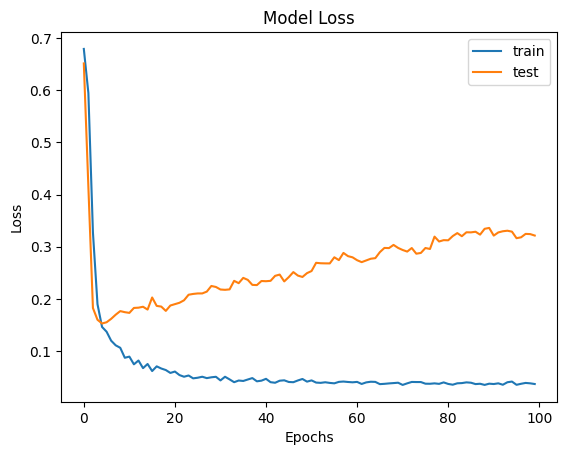

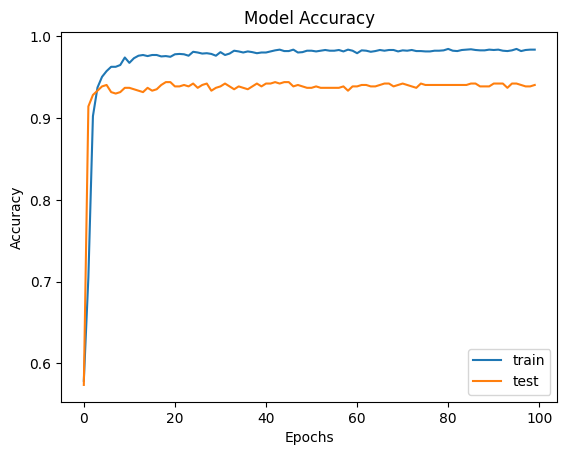

In [ ]:
# Plot loss curve
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot test accuracy
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


23/23 [==============================] - 0s 4ms/step


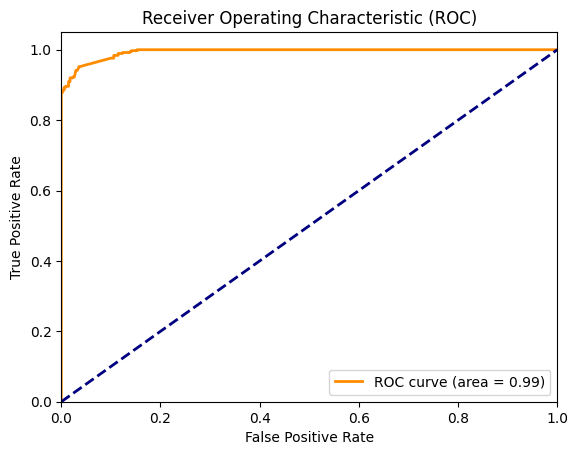

In [ ]:
!pip install tensorflow
import tensorflow as tf
from sklearn.metrics import roc_curve, auc
from matplotlib import pyplot as plt

# Predict probabilities for test set
y_pred_proba = bilstm_model.predict(X_test.toarray())

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

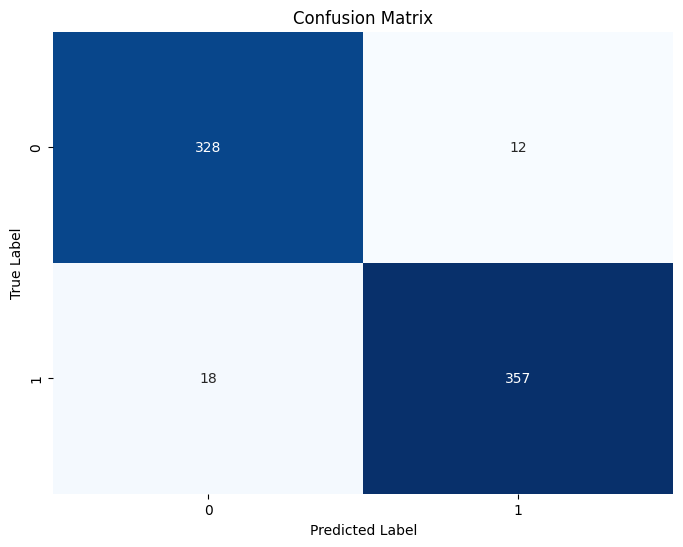

In [ ]:
# prompt: now display this

# Display the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
